In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [19]:
df=pd.read_csv('stud.csv')


In [20]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [21]:
df.shape

(1000, 8)

CHECK FOR MISSING VALUS

In [22]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

SO NO MISSING VALUS IN THE DATASET

CHECKING FOR DUPLICATES

In [23]:
df.duplicated().sum()

0

FOR DROPPING DUPLICATES
1) df = df.drop_duplicates()
2) df = df.drop_duplicates(subset=['column1', 'column2'])
3) # Keep the first occurrence (default)
df = df.drop_duplicates(keep='first')

# Keep the last occurrence
df = df.drop_duplicates(keep='last')

# Remove all duplicates
df = df.drop_duplicates(keep=False)
4) df.drop_duplicates(inplace=True)
5) df.reset_index(drop=True, inplace=True)


CHECK DATATPYES

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


CHECKING NUMBER OF UNIQUE VALUES OF EACH COLUMN

In [25]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

THE STATISTICS OF THE DATA

In [26]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [27]:
print("Categories in 'gender' variable: ",end=" ")
print(df['gender'].unique())
print("Categories in 'race/ethnicity' variable: ",end=" ")
print(df['race/ethnicity'].unique())
print("Categories in 'parental level of education' variable: ",end=" ")
print(df['parental level of education'].unique())
print("Categories in 'lunch' variable: ",end=" ")
print(df['lunch'].unique())
print("Categories in 'test preparation course' variable: ",end=" ")
print(df['test preparation course'].unique())


Categories in 'gender' variable:  ['female' 'male']
Categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [28]:
#define numerical and categorical columns
numeric_features=[feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']
#print columns
print("We have {} numerical features : {}".format(len(numeric_features),numeric_features))
print("\nWe have {} categorical features: {}".format(len(categorical_features),categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


ADDING COLUMNS FOR TOTAL SCORE

In [29]:
df['total score']=df['math score']+df['reading score']+df['writing score']
df['average']=round(df['total score']/3,2)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [36]:
reading_full = (df['reading score'] == 100).sum()
print(f'Number of students with full Marks in Reading:{reading_full}')


Number of students with full Marks in Reading:17


In [37]:
reading_full=df[df['reading score']==100]['average'].count()
writing_full=df[df['writing score']==100]['average'].count()
math_full=df[df['math score']==100]['average'].count()
print(f'Number of students with full Marks in Maths:{math_full}')
print(f'Number of students with full Marks in Writing:{writing_full}')
print(f'Number of students with full Marks in Reading:{reading_full}')


Number of students with full Marks in Maths:7
Number of students with full Marks in Writing:14
Number of students with full Marks in Reading:17


VISUALIZE

<Axes: xlabel='average', ylabel='Count'>

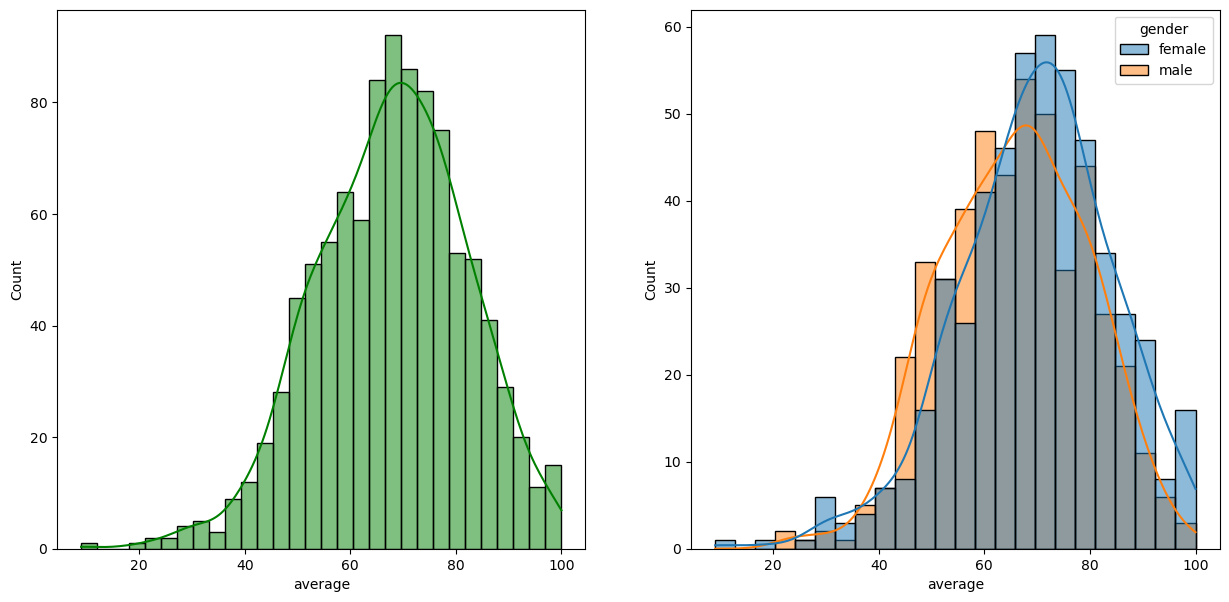

In [ ]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

MODEL TRAINING

In [48]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [45]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


Math Score is an INDEPENDENT FEATURE

In [57]:
X=df.drop(columns=['math score'],axis=1)
y=df['math score']



In [58]:
#Create a Column Transformer with 3 types of transformer
num_features=X.select_dtypes(exclude='O').columns
cat_features=X.select_dtypes(include='O').columns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
#ColumnTransformer make first OneHotEncoder happens then StandardScaler happens
numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()# Feature
preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
    ]
)
#CONVERT EVERYTHING INTO NUMERICAL FEATURE AND THEN APPLY STANDARDIZATION
 

In [59]:
X=preprocessor.fit_transform(X)
X.shape

(1000, 21)

In [60]:
# Separate Dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape


((800, 21), (200, 21))

CREATE AN EVALUATE FUNCTION TO GIVE ALL METRICS AFTER MODEL TRAINING

In [61]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_absolute_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae,rmse,r2_square

In [62]:
models={
    "Linear Regression": LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoosting Regressor":CatBoostRegressor(verbose=False),
    "AdaBoost Regressor":AdaBoostRegressor()
}
model_list=[]
r2_list=[]
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)#Train model
    #Make Prediction
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    #Evaluate Train and Test dataset
    model_train_mae,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print('Model performance for Training set')
    print('- Root Mean Squared Error:{:.4f}'.format(model_train_rmse))
    print('-Mean Absolute Error:{:.4f}'.format(model_train_mae))
    print('-------------')
    print('Model performance for Test set')
    print('Model performance for Training set')
    print('- Root Mean Squared Error:{:.4f}'.format(model_train_rmse))
    print('-Mean Absolute Error:{:.4f}'.format(model_train_mae))
    r2_list.append(model_test_r2)
    print('='*35)
    print('\n')
    

Linear Regression
Model performance for Training set
- Root Mean Squared Error:0.0000
-Mean Absolute Error:0.0000
-------------
Model performance for Test set
Model performance for Training set
- Root Mean Squared Error:0.0000
-Mean Absolute Error:0.0000


Lasso
Model performance for Training set
- Root Mean Squared Error:1.9349
-Mean Absolute Error:3.7439
-------------
Model performance for Test set
Model performance for Training set
- Root Mean Squared Error:1.9349
-Mean Absolute Error:3.7439


Ridge
Model performance for Training set
- Root Mean Squared Error:0.5218
-Mean Absolute Error:0.2723
-------------
Model performance for Test set
Model performance for Training set
- Root Mean Squared Error:0.5218
-Mean Absolute Error:0.2723


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error:1.8398
-Mean Absolute Error:3.3850
-------------
Model performance for Test set
Model performance for Training set
- Root Mean Squared Error:1.8398
-Mean Absolute Error:3

Results

In [63]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score']).sort_values(by=['R2_Score'],ascending=False)


,Model Name,R2_Score
0,Linear Regression,1.000000
2,Ridge,0.999514
5,XGBRegressor,0.977101
6,CatBoosting Regressor,0.968100
4,Decision Tree,0.937679
7,AdaBoost Regressor,0.926241
1,Lasso,0.908561
3,K-Neighbors Regressor,0.889781


LINEAR REGREESION

In [64]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f"%score)

Accuracy of the model is 100.00
